In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.pipeline import make_pipeline 
from sklearn.ensemble import RandomForestClassifier
from string import punctuation
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# punctuation = punctuation + '\n' + '—' + '“' + ',' + '”' + '‘' + '-' + '’'
import re
import joblib


ModuleNotFoundError: No module named 'nltk'

In [ ]:
df = pd.read_csv('./bbc-news-data.csv',sep='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
X,y = df.loc[:,'content'], df.loc[:,'category']
X.shape == y.shape

True

In [ ]:
from app.utils import preprocessing
# def preprocessing(text):
#     # removing non alphanumeric characters
#     text = re.sub(r'[^A-Z a-z 0-9]','',text)

#     #removing punctuations
#     text =  ''.join(char for char in text if char not in punctuation)
    
#     #removing trailing whitespaces again
#     text = re.sub(r' +',' ', text)
    
#     #removing the stopword
#     text =  ' '.join(word for word in text.split() if word not in stop_words)


#     return text.lower()

In [ ]:
X = X.apply(lambda x:preprocessing(x))

In [ ]:
X.shape

(2225,)

In [ ]:
pipe = make_pipeline(TfidfVectorizer(),LogisticRegression())
pipe

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(y)
X_train , X_val, y_train, y_val = train_test_split(X,labels,test_size=0.2,stratify=labels,random_state=42)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred = pipe.predict(X_val)
f1_score(y_val,y_pred,average='weighted')

0.9887325858141044

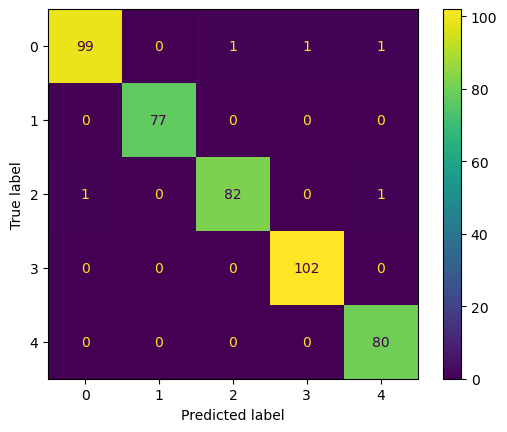

In [ ]:
cm = confusion_matrix(y_val,y_pred)
ConfusionMatrixDisplay(cm).plot()

# Retrain the whole model and save it in a file

In [ ]:
pipe.fit(X,y)
filename = './category_predictor.sav'
joblib.dump(pipe, filename)

['./category_predictor.sav']